## Import Libraries

In [1]:
import os
import random
import numpy as np
import tensorflow as tf
from tqdm.notebook import tqdm
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

## Parameters

In [2]:
epochs = 10
batch_size = 32
margin = 1  # Margin for constrastive loss

## Allocate Gpu memory for efficiency

In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    print(e)

1 Physical GPUs, 1 Logical GPUs


# Create Txt File for Dataset

In [59]:
# data_path = '../data_reduced/train_data/'
# data_path = '../data_reduced/val_data/'
data_path = '../data_reduced/test_data/'

# txt_path = '../data_reduced/train_data_list.txt'
# txt_path = '../data_reduced/val_data_list.txt'
txt_path = '../data_reduced/test_data_list.txt'



In [60]:
# Go thorugh list of images in the dataset
list_of_images = []
for dirname in tqdm(os.listdir(data_path)):
    image_folder_path = os.path.join(data_path, dirname)
    for img in tqdm(os.listdir(image_folder_path), leave=True, position=1):
        list_of_images.append(dirname + '/' + img)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [61]:
# create txt file to store image class & name
with open(txt_path, 'w') as f:
    for item in list_of_images:
        f.write("%s\n" % item)

# Preprocess Data

In [62]:
# array to store all images & labels for training in numpy array format
img_height = 100
img_width = 100

# open train.txt file
txt_file = open(txt_path, 'r').read().splitlines() 

### Process train data

In [31]:
train_images = []
train_labels = []

for i in tqdm(txt_file):
  path = data_path + i # access each image path on Train folder
  img = image.load_img(path, target_size=(img_height, img_width, 3)) # load & resize each image based on the path
  img = image.img_to_array(img) # convert each image data to numpy array
  img = img/255.0 # standardize RGB channel values of each image to be in the [0, 1] range
  train_images.append(img) # store each converted & standardize image to train_images array
  label = i.split('/')[0]
  train_labels.append(int(label.split('n')[1])) # store labels for each image to train_labels array

# convert both array to numpy array
train_images = np.array(train_images)
train_labels = np.array(train_labels)

  0%|          | 0/16095 [00:00<?, ?it/s]

### Process val data

In [ ]:
val_images = []
val_labels = []

for i in tqdm(txt_file):
  path = data_path + i # access each image path on Val folder
  img = image.load_img(path, target_size=(img_height, img_width, 3)) # load & resize each image based on the path
  img = image.img_to_array(img) # convert each image data to numpy array
  img = img/255.0 # standardize RGB channel values of each image to be in the [0, 1] range
  val_images.append(img) # store each converted & standardize image to val_images array
  label = i.split('/')[0]
  val_labels.append(int(label.split('n')[1])) # store labels for each image to val_labels array

# convert both array to numpy array
val_images = np.array(val_images)
val_labels = np.array(val_labels)

### Process test data

In [65]:
test_images = []
test_labels = []

for i in tqdm(txt_file):
  path = data_path + i # access each image path on Test folder
  img = image.load_img(path, target_size=(img_height, img_width, 3)) # load & resize each image based on the path
  img = image.img_to_array(img) # convert each image data to numpy array
  img = img/255.0 # standardize RGB channel values of each image to be in the [0, 1] range
  test_images.append(img) # store each converted & standardize image to test_images array
  label = i.split('/')[0]
  test_labels.append(int(label.split('n')[1])) # store labels for each image to test_labels array

# convert both array to numpy array
test_images = np.array(test_images)
test_labels = np.array(test_labels)

  0%|          | 0/400 [00:00<?, ?it/s]

### Save the processed data

In [67]:
base_data_path = '../data_reduced/'

# np.save(base_data_path + 'train_images_array', train_images)
# np.save(base_data_path + 'train_labels_array', train_labels)

# np.save(base_data_path + 'val_images_array', val_images)
# np.save(base_data_path + 'val_labels_array', val_labels)

np.save(base_data_path + 'test_images_array', test_images)
np.save(base_data_path + 'test_labels_array', test_labels)

### Load the processed data

In [4]:
train_images = np.load('../data_reduced/train_images_array.npy')
train_labels = np.load('../data_reduced/train_labels_array.npy')

val_images = np.load('../data_reduced/val_images_array.npy')
val_labels = np.load('../data_reduced/val_labels_array.npy')

test_images = np.load('../data_reduced/test_images_array.npy')
test_labels = np.load('../data_reduced/test_labels_array.npy')

### Convert labels

In [5]:
# convert labels of dataset so that it can be used for make_pairs function
# for train labels
actual_label = 3
converted_label = 0
train_labels_converted = []

for i in train_labels:
    if actual_label == i:
        train_labels_converted.append(converted_label)
    else:
        converted_label += 1
        train_labels_converted.append(converted_label)
        actual_label = i
        
train_labels_converted = np.array(train_labels_converted)

In [6]:
train_labels_converted

array([  0,   0,   0, ..., 199, 199, 199])

In [7]:
# for val labels
actual_label = 3
converted_label = 0
val_labels_converted = []

for i in val_labels:
    if actual_label == i:
        val_labels_converted.append(converted_label)
    else:
        converted_label += 1
        val_labels_converted.append(converted_label)
        actual_label = i

val_labels_converted = np.array(val_labels_converted)

In [8]:
val_labels_converted

array([  0,   0,   1,   1,   2,   2,   3,   3,   4,   4,   5,   5,   6,
         6,   7,   7,   8,   8,   9,   9,  10,  10,  11,  11,  12,  12,
        13,  13,  14,  14,  15,  15,  16,  16,  17,  17,  18,  18,  19,
        19,  20,  20,  21,  21,  22,  22,  23,  23,  24,  24,  25,  25,
        26,  26,  27,  27,  28,  28,  29,  29,  30,  30,  31,  31,  32,
        32,  33,  33,  34,  34,  35,  35,  36,  36,  37,  37,  38,  38,
        39,  39,  40,  40,  41,  41,  42,  42,  43,  43,  44,  44,  45,
        45,  46,  46,  47,  47,  48,  48,  49,  49,  50,  50,  51,  51,
        52,  52,  53,  53,  54,  54,  55,  55,  56,  56,  57,  57,  58,
        58,  59,  59,  60,  60,  61,  61,  62,  62,  63,  63,  64,  64,
        65,  65,  66,  66,  67,  67,  68,  68,  69,  69,  70,  70,  71,
        71,  72,  72,  73,  73,  74,  74,  75,  75,  76,  76,  77,  77,
        78,  78,  79,  79,  80,  80,  81,  81,  82,  82,  83,  83,  84,
        84,  85,  85,  86,  86,  87,  87,  88,  88,  89,  89,  9

In [9]:
# for test labels
actual_label = 3
converted_label = 0
test_labels_converted = []

for i in test_labels:
    if actual_label == i:
        test_labels_converted.append(converted_label)
    else:
        converted_label += 1
        test_labels_converted.append(converted_label)
        actual_label = i

test_labels_converted = np.array(test_labels_converted)

In [10]:
test_labels_converted

array([  0,   0,   1,   1,   2,   2,   3,   3,   4,   4,   5,   5,   6,
         6,   7,   7,   8,   8,   9,   9,  10,  10,  11,  11,  12,  12,
        13,  13,  14,  14,  15,  15,  16,  16,  17,  17,  18,  18,  19,
        19,  20,  20,  21,  21,  22,  22,  23,  23,  24,  24,  25,  25,
        26,  26,  27,  27,  28,  28,  29,  29,  30,  30,  31,  31,  32,
        32,  33,  33,  34,  34,  35,  35,  36,  36,  37,  37,  38,  38,
        39,  39,  40,  40,  41,  41,  42,  42,  43,  43,  44,  44,  45,
        45,  46,  46,  47,  47,  48,  48,  49,  49,  50,  50,  51,  51,
        52,  52,  53,  53,  54,  54,  55,  55,  56,  56,  57,  57,  58,
        58,  59,  59,  60,  60,  61,  61,  62,  62,  63,  63,  64,  64,
        65,  65,  66,  66,  67,  67,  68,  68,  69,  69,  70,  70,  71,
        71,  72,  72,  73,  73,  74,  74,  75,  75,  76,  76,  77,  77,
        78,  78,  79,  79,  80,  80,  81,  81,  82,  82,  83,  83,  84,
        84,  85,  85,  86,  86,  87,  87,  88,  88,  89,  89,  9

### Create Image Pairs for training

In [11]:
def make_pairs(images, labels):
    """Produce a tuple containing image pairs with respective label.

    Parameters:
        images: List of images, each index in the list corresponds to one image.
        labels: List of labels, each label determines the class of the image.

    Returns:
        Tuple containing two np arrays as (pairs_of_samples, labels),
        where pairs_of_samples' shape is (2len(x), 2,n_features_dims) and
        labels are a binary array of shape (2len(x)).
    """

    num_classes  = len(np.unique(labels))
    idx = [np.where(labels == i)[0] for i in range(0, num_classes)]

    pair_images  = []
    pair_labels  = []

    for idx1 in range(len(images)):
        # append a matching example
        current_image = images[idx1]
        label = labels[idx1]
        
        idx2 = np.random.choice(idx[label])
        pos_image = images[idx2]

        pair_images.append([current_image, pos_image])
        pair_labels.append([1]) 

        # append a non-matching example
        neg_idx = np.where(labels != label)[0]
        neg_image = images[np.random.choice(neg_idx)]

        pair_images.append([current_image, neg_image])
        pair_labels.append([0])

    return np.array(pair_images), np.array(pair_labels).astype("float32")


In [12]:
# make train pairs
pairs_train, labels_train = make_pairs(train_images, train_labels_converted)

# make validation pairs
pairs_val, labels_val = make_pairs(val_images, val_labels_converted)

# make test pairs
pairs_test, labels_test = make_pairs(test_images, test_labels_converted)

### Split the images from the pair for training input shape

In [13]:
x_train_1 = pairs_train[:, 0]  # x_train_1.shape is (60000, 28, 28)
x_train_2 = pairs_train[:, 1]

In [14]:
x_val_1 = pairs_val[:, 0]  # x_val_1.shape = (60000, 28, 28)
x_val_2 = pairs_val[:, 1]

In [15]:
x_test_1 = pairs_test[:, 0]  # x_test_1.shape = (60000, 28, 28)
x_test_2 = pairs_test[:, 1]

In [16]:
# check the shape of pairs
print(pairs_train.shape)
print(pairs_train[:, 0].shape)
print(pairs_train[:, 1].shape)

(32190, 2, 100, 100, 3)
(32190, 100, 100, 3)
(32190, 100, 100, 3)


In [17]:
print(pairs_val.shape)
print(pairs_val[:, 0].shape)
print(pairs_val[:, 1].shape)

(800, 2, 100, 100, 3)
(800, 100, 100, 3)
(800, 100, 100, 3)


In [18]:
print(pairs_test.shape)
print(pairs_test[:, 0].shape)
print(pairs_test[:, 1].shape)

(800, 2, 100, 100, 3)
(800, 100, 100, 3)
(800, 100, 100, 3)


### Visualize the images of the pairs

In [19]:
def visualize(pairs, labels, to_show=10, num_col=5, predictions=None, test=False):
    """Produce a plot of pairs and labels, and prediction if it's test dataset.

    Parameters:
        pairs: Np Array, of pairs to visualize, having shape
               (Number of pairs, 2, 100, 100).
        to_show: Num of examples to visualize (default is 10)
                `to_show` must be an integral multiple of `num_col`.
                 Else it will be trimmed if it is greater than num_col,
                 and incremented if it is less then num_col.
        num_col: Num of images in one row - (default is 5)
        predictions: Np Array of predictions with shape (to_show, 1) -
                     (default is None)
                     Must be passed when test=True.
        test: Boolean to check if the dataset being visualized is
              of train or test - (default False).
    """

    # Define num_row
    # If to_show % num_col != 0
    #    trim to_show,
    #       to trim to_show limit num_row to the point where
    #       to_show % num_col == 0
    #
    # If to_show//num_col == 0
    #    then it means num_col is greater then to_show
    #    increment to_show
    #       to increment to_show set num_row to 1
    num_row = to_show // num_col if to_show // num_col != 0 else 1

    # `to_show` must be an integral multiple of `num_col`
    #  we found num_row and we have num_col
    #  to increment or decrement to_show
    #  to make it integral multiple of `num_col`
    #  simply set it equal to num_row * num_col
    to_show = num_row * num_col

    # Plot the images
    fig, axes = plt.subplots(num_row, num_col, figsize=(10, 10))

    for i in range(to_show):

        # If the number of rows is 1, the axes array is one-dimensional
        if num_row == 1:
            ax = axes[i % num_col]
        else:
            ax = axes[i // num_col, i % num_col]

        ax.imshow(tf.concat([pairs[i][0], pairs[i][1]], axis=1))
        ax.set_axis_off()
        if test:
            ax.set_title("True: {} | Pred: {:.5f}".format(labels[i], predictions[i][0]))
        else:
            ax.set_title("Label: {}".format(labels[i]))
    if test:
        plt.tight_layout(rect=(0, 0, 1.9, 0.8), w_pad=0.0)
    else:
        plt.tight_layout(rect=(0, 0, 1.5, 1))
    plt.show()

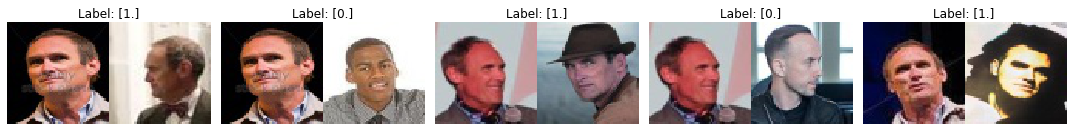

In [20]:
visualize(pairs_train[:-1], labels_train[:-1], to_show=5, num_col=5)

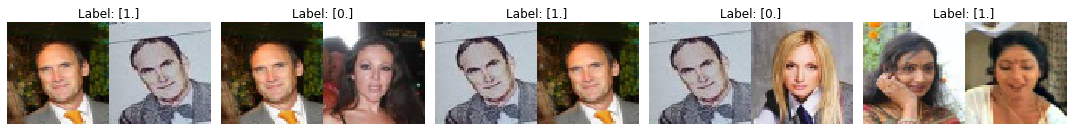

In [21]:
visualize(pairs_val[:-1], labels_val[:-1], to_show=5, num_col=5)

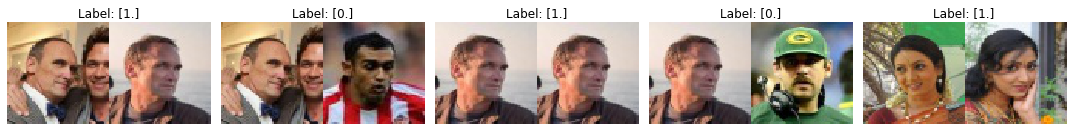

In [22]:
visualize(pairs_test[:-1], labels_test[:-1], to_show=5, num_col=5)

# Build the Siamese Network

In [336]:
def euclidean_distance(vects):
    """Find the Euclidean distance between two vectors.

    Parameters:
        vects: List of two tensors of same length.

    Returns:
        Tensor containing euclidean distance
        (as floating point value) between vectors.
    """

    x, y = vects
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    return tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))

# Create the Embedding model
input = layers.Input((100, 100, 3))

# model 1
# x = tf.keras.layers.BatchNormalization()(input)
# x = layers.Conv2D(4, (5, 5), activation="tanh")(x)
# x = layers.AveragePooling2D(pool_size=(2, 2))(x)
# x = layers.Conv2D(16, (5, 5), activation="tanh")(x)
# x = layers.AveragePooling2D(pool_size=(2, 2))(x)
# x = layers.Flatten()(x)

# x = tf.keras.layers.BatchNormalization()(x)
# x = layers.Dense(200, activation="tanh")(x)
# embedding_network = keras.Model(input, x)

# model 2
# x = tf.keras.layers.BatchNormalization()(input)
# x = layers.Conv2D(4, (5, 5), activation="relu")(x)
# x = layers.AveragePooling2D(pool_size=(2, 2))(x)
# x = layers.Conv2D(16, (5, 5), activation="relu")(x)
# x = layers.AveragePooling2D(pool_size=(2, 2))(x)
# x = layers.Flatten()(x)

# x = tf.keras.layers.BatchNormalization()(x)
# x = layers.Dense(200, activation="relu")(x)
# embedding_network = keras.Model(input, x)

# model 3 best
x = layers.BatchNormalization()(input)
x = layers.Dropout(0.1)(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(128, (7, 7), activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(128, (4, 4), activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(256, (4, 4), activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1)(x)
x = layers.Flatten()(x)

x = layers.Dense(4096, activation="sigmoid")(x)
embedding_network = keras.Model(input, x)


input_1 = layers.Input((100, 100, 3))
input_2 = layers.Input((100, 100, 3))

# Siamese Network share weights between
# tower networks (sister networks). To allow this, we will use
# same embedding network for both tower networks.
tower_1 = embedding_network(input_1)
tower_2 = embedding_network(input_2)

merge_layer = layers.Lambda(euclidean_distance)([tower_1, tower_2])
normal_layer = tf.keras.layers.BatchNormalization()(merge_layer)
output_layer = layers.Dense(1, activation="sigmoid")(normal_layer)
siamese = keras.Model(inputs=[input_1, input_2], outputs=output_layer)

In [337]:
embedding_network.summary() # check architecture of embedding network

Model: "model_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_109 (InputLayer)       [(None, 100, 100, 3)]     0         
_________________________________________________________________
batch_normalization_121 (Bat (None, 100, 100, 3)       12        
_________________________________________________________________
dropout_20 (Dropout)         (None, 100, 100, 3)       0         
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 44, 44, 128)       18944     
_________________________________________________________________
batch_normalization_122 (Bat (None, 44, 44, 128)       512       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 22, 22, 128)       0  

In [338]:
def loss(margin=1):
    """Provides 'constrastive_loss' an enclosing scope with variable 'margin'.

  Parameters:
      margin: determine the baseline for distance for which pairs
              should be classified as dissimilar. - (default is 1).

  Returns:
      'constrastive_loss' function with data ('margin') attached.
  """

    def contrastive_loss(y_true, y_pred):
        """Calculates the constrastive loss.

      Parameters:
          y_true: List of labels, each label is of type float32.
          y_pred: List of predictions of same length as of y_true,
                  each label is of type float32.

      Returns:
          A tensor containing constrastive loss as floating point value.
      """

        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean(
            (1 - y_true) * square_pred + (y_true) * margin_square
        )

    return contrastive_loss

In [339]:
# set the early stop, checkpoint, learning rate reduction methods here if needed
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

checkpoint_filepath = './models/best_model_weights.h5' # './models/best_model/weights.{epoch:02d}-{val_accuracy:.4f}.h5'

early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, verbose=1) # stop the training if the parameters satisfied
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)  # reduce learning rate if the parameters satisfied
# save the weights of the best model based on val accuracy
model_check_point = ModelCheckpoint(checkpoint_filepath, monitor='val_accuracy', mode='max', verbose=1, save_weights_only=True, save_best_only=True) # '/content/drive/MyDrive/assignment1-aml/best_model.h5'

# uncomment the methods to be included during the training
callbacks = [ # learning_rate_reduction, 
             #early_stop, 
             model_check_point]

In [ ]:
# compile the model with chosen optimizer & custom Contrastive Loss
opt = keras.optimizers.Adam(learning_rate=0.001)
siamese.compile(loss=loss(margin=margin), 
                optimizer=opt, # lr=0.001 (default), # Adam # RMSprop
                metrics=["accuracy"])

In [340]:
siamese.summary() #check the Siamese Network architecture

Model: "model_75"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_110 (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
input_111 (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
model_74 (Functional)           (None, 4096)         38560652    input_110[0][0]                  
                                                                 input_111[0][0]                  
__________________________________________________________________________________________________
lambda_36 (Lambda)              (None, 1)            0           model_74[0][0]            

# Train the Siamese Network with Contrastive Loss

In [330]:
history = siamese.fit(
    [x_train_1, x_train_2],
    labels_train,
    validation_data=([x_val_1, x_val_2], labels_val),
    batch_size=32,
    epochs=10,
    callbacks=callbacks,
)

Epoch 1/10
1006/1006 [==============================] - 20s 18ms/step - loss: 0.2553 - accuracy: 0.4859 - val_loss: 0.2507 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to ./models\best_model_weights.h5
Epoch 2/10
1006/1006 [==============================] - 15s 15ms/step - loss: 0.2497 - accuracy: 0.5060 - val_loss: 0.1770 - val_accuracy: 0.7513

Epoch 00002: val_accuracy improved from 0.50000 to 0.75125, saving model to ./models\best_model_weights.h5
Epoch 3/10
1006/1006 [==============================] - 15s 15ms/step - loss: 0.2171 - accuracy: 0.6555 - val_loss: 0.1535 - val_accuracy: 0.7788

Epoch 00003: val_accuracy improved from 0.75125 to 0.77875, saving model to ./models\best_model_weights.h5
Epoch 4/10
1006/1006 [==============================] - 15s 15ms/step - loss: 0.1901 - accuracy: 0.7102 - val_loss: 0.1520 - val_accuracy: 0.7663

Epoch 00004: val_accuracy did not improve from 0.77875
Epoch 5/10
1006/1006 [=================

# Evaluate the trained Siamese Network

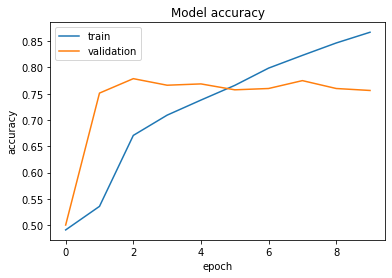

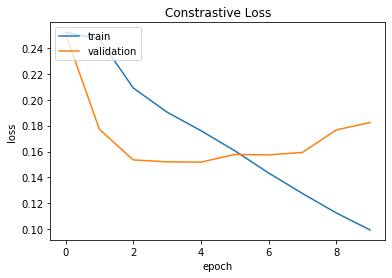

In [332]:
# plot the laerning curve
def plt_metric(history, metric, title, has_valid=True):
    """Plots the given 'metric' from 'history'.

    Parameters:
        history: history attribute of History object returned from Model.fit.
        metric: Metric to plot, a string value present as key in 'history'.
        title: A string to be used as title of plot.
        has_valid: Boolean, true if valid data was passed to Model.fit else false.

    Returns:
        None.
    """
    plt.plot(history[metric])
    if has_valid:
        plt.plot(history["val_" + metric])
        plt.legend(["train", "validation"], loc="upper left")
    plt.title(title)
    plt.ylabel(metric)
    plt.xlabel("epoch")
    plt.show()


# Plot the accuracy
plt_metric(history=history.history, metric="accuracy", title="Model accuracy")

# Plot the constrastive loss
plt_metric(history=history.history, metric="loss", title="Constrastive Loss")

In [343]:
# evaluate the siamese network
results = siamese.evaluate([x_test_1, x_test_2], labels_test)
print("test loss, test acc:", results)

25/25 [==============================] - 1s 12ms/step - loss: 0.1330 - accuracy: 0.8332
test loss, test acc: [0.14224877953529358, 0.8149999976158142]


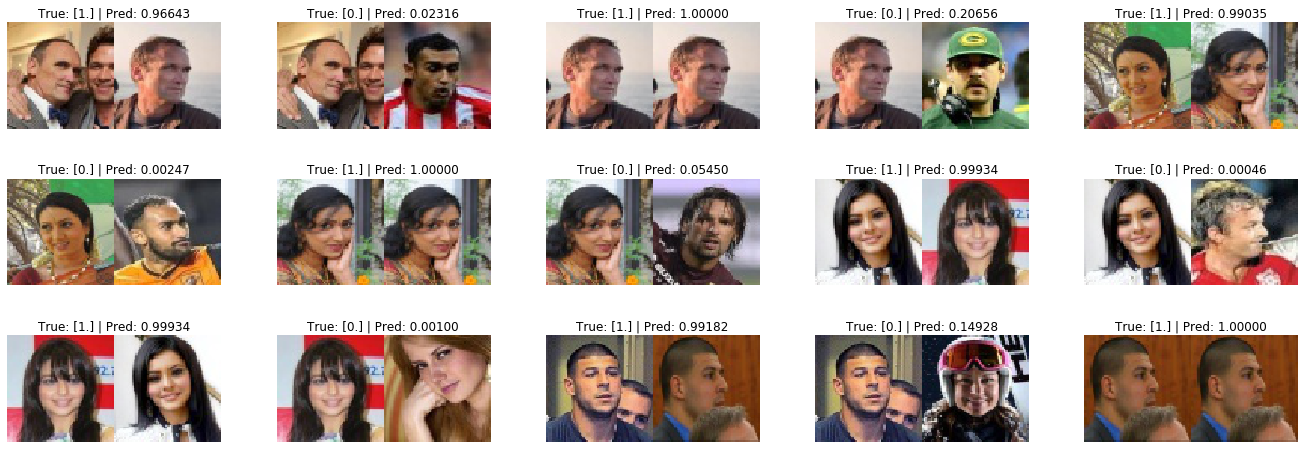

In [344]:
# perform predictions using the siamese network
predictions = siamese.predict([x_test_1, x_test_2])

# visulaize the result of test predictions using the siamese network
visualize(pairs_test, labels_test, to_show=15, num_col=5, predictions=predictions, test=True)

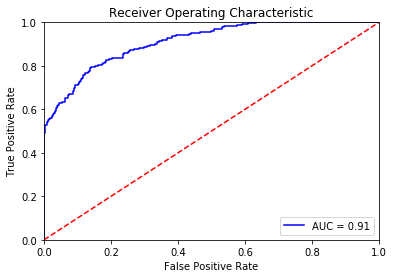

In [342]:
# plot the ROC AUC Score Curve
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds = siamese.predict([x_test_1, x_test_2])
fpr, tpr, threshold = metrics.roc_curve(labels_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [184]:
# save the model
# siamese.save("./models/siamese_net_model.h5")

# save the model weights
# siamese.save_weights("./models/siamese_net_weights.h5")

# Note: saving the model is not suggested as it will perform a failure if you load the model with custom layer, instead saving only the weights and load it.
# You can refer to this https://blog.paperspace.com/working-with-the-lambda-layer-in-keras/

In [341]:
# load the model weights
# siamese.load_weights('./models/model3_weights/siamese_net_weights.h5')
# siamese.load_weights('./models/model2_weights/best_model_weights.h5')
# siamese.load_weights('./models/model1_weights/best_model_weights.h5')